In [2]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image
from matplotlib.transforms import Bbox
# import cv2
import random

In [3]:
def div_list(ls,n):
   result = []
   cut = int(len(ls)/n)
   if cut == 0:
       ls = [[x] for x in ls]
       none_array = [[] for i in range(0, n-len(ls))]
       return ls+none_array
   for i in range(0, n-1):
       result.append(ls[cut*i:cut*(1+i)])
   result.append(ls[cut*(n-1):len(ls)])
   return result

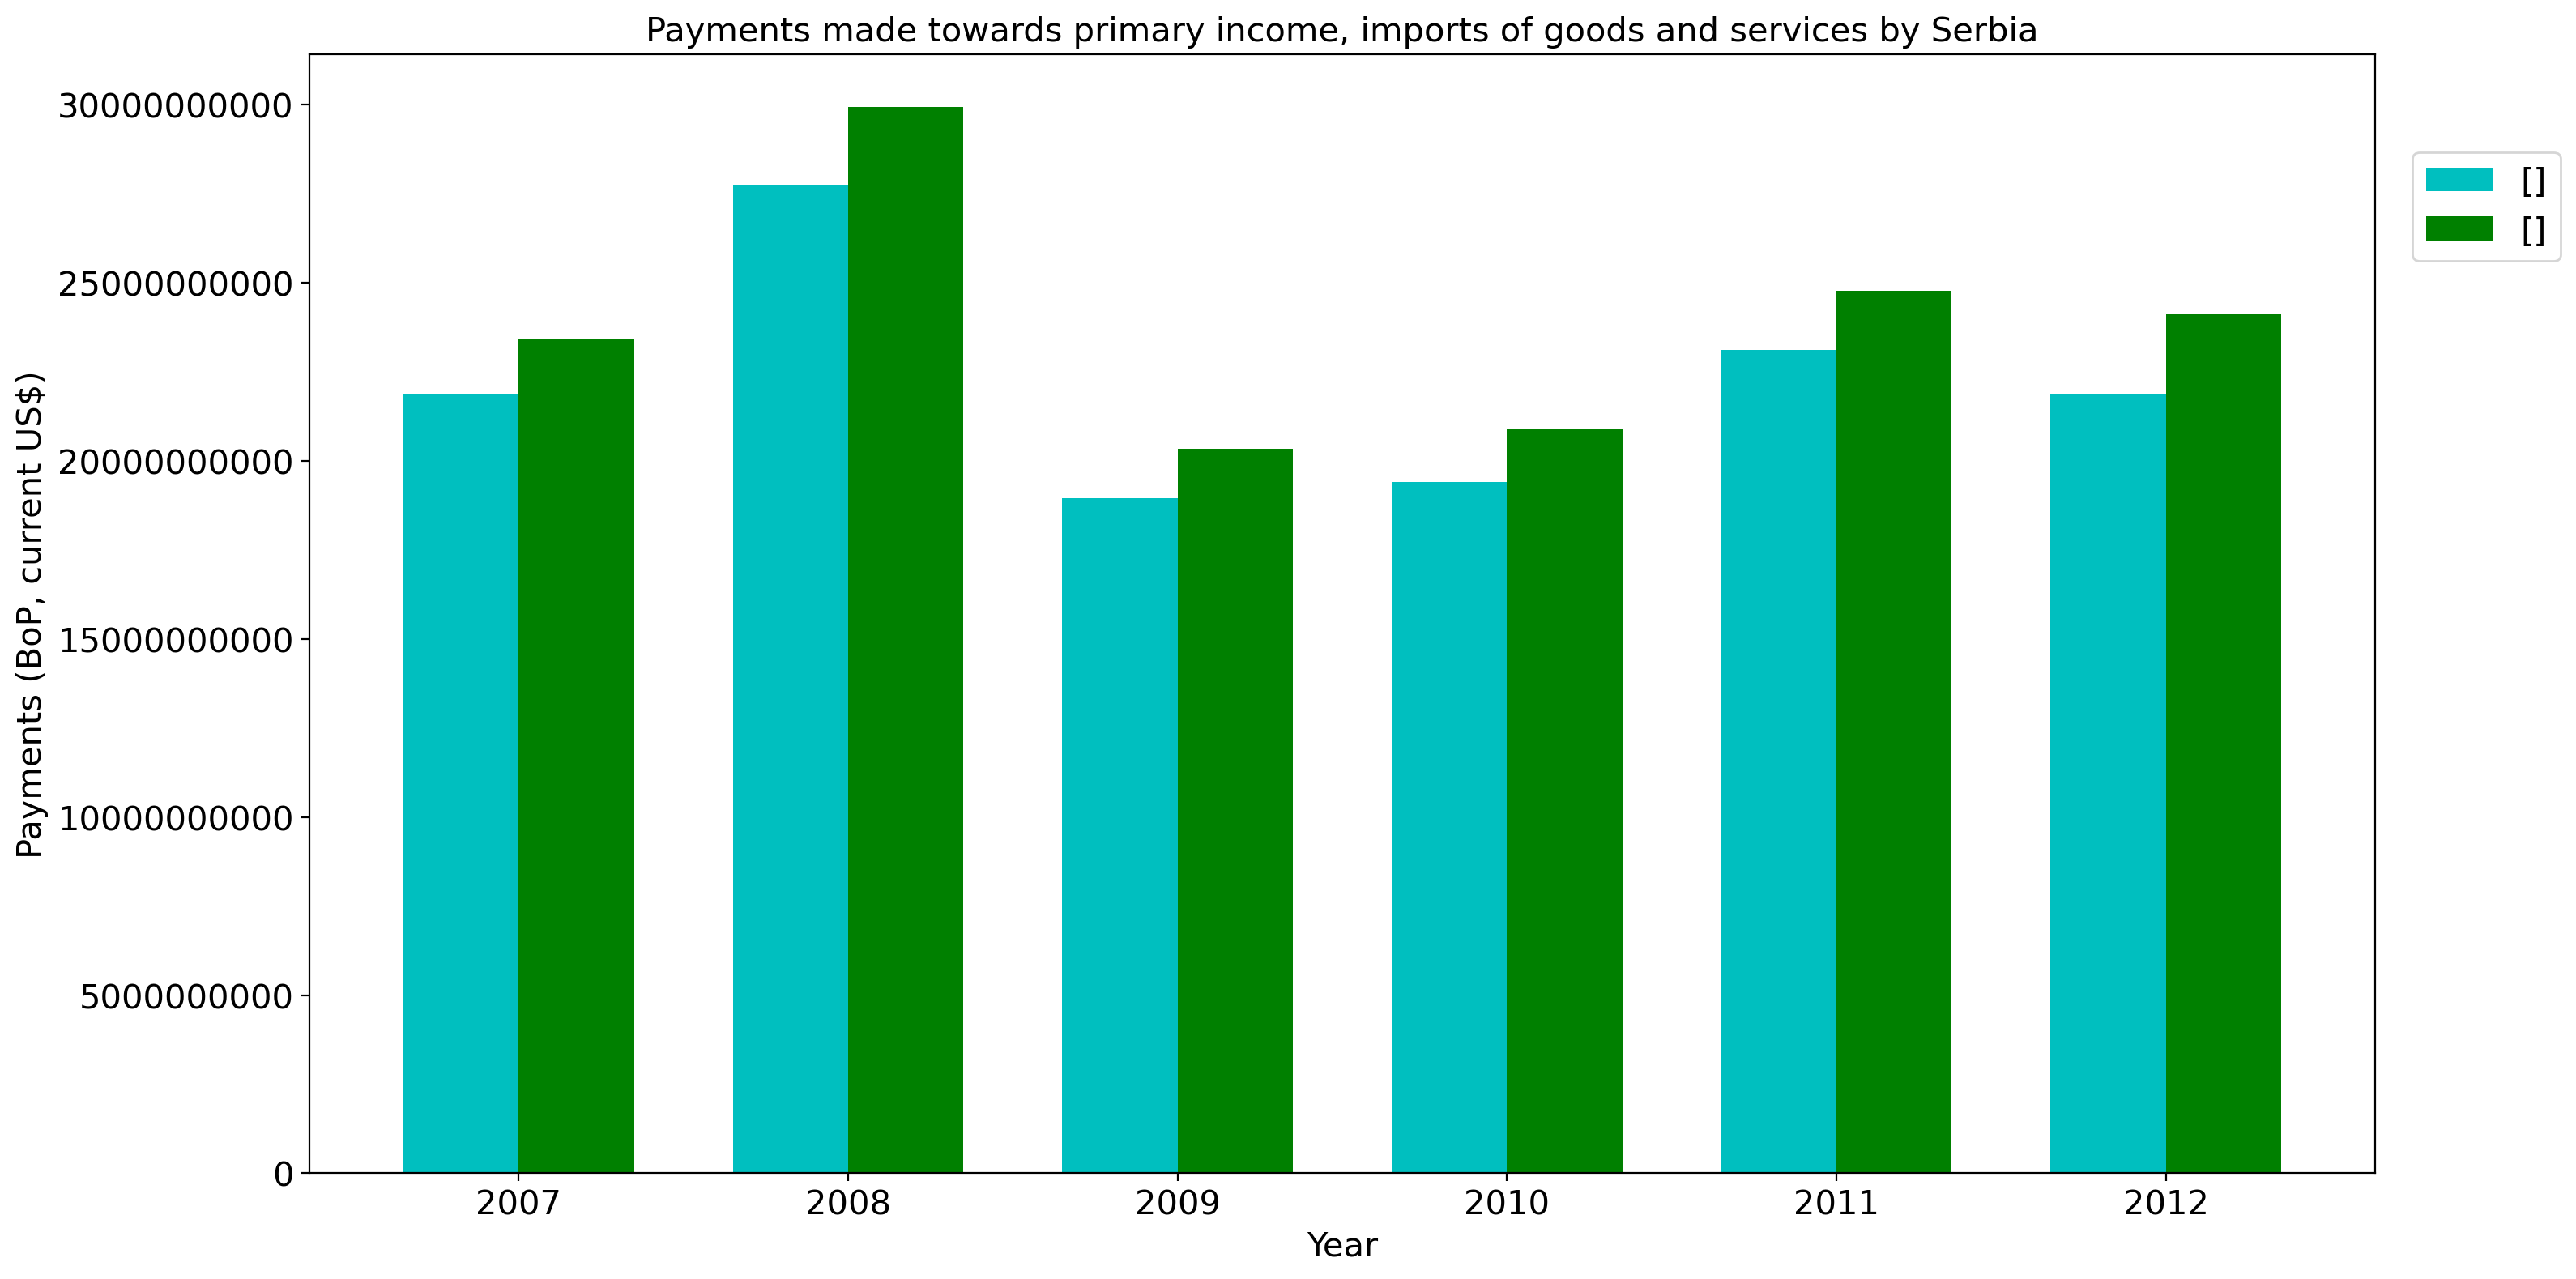

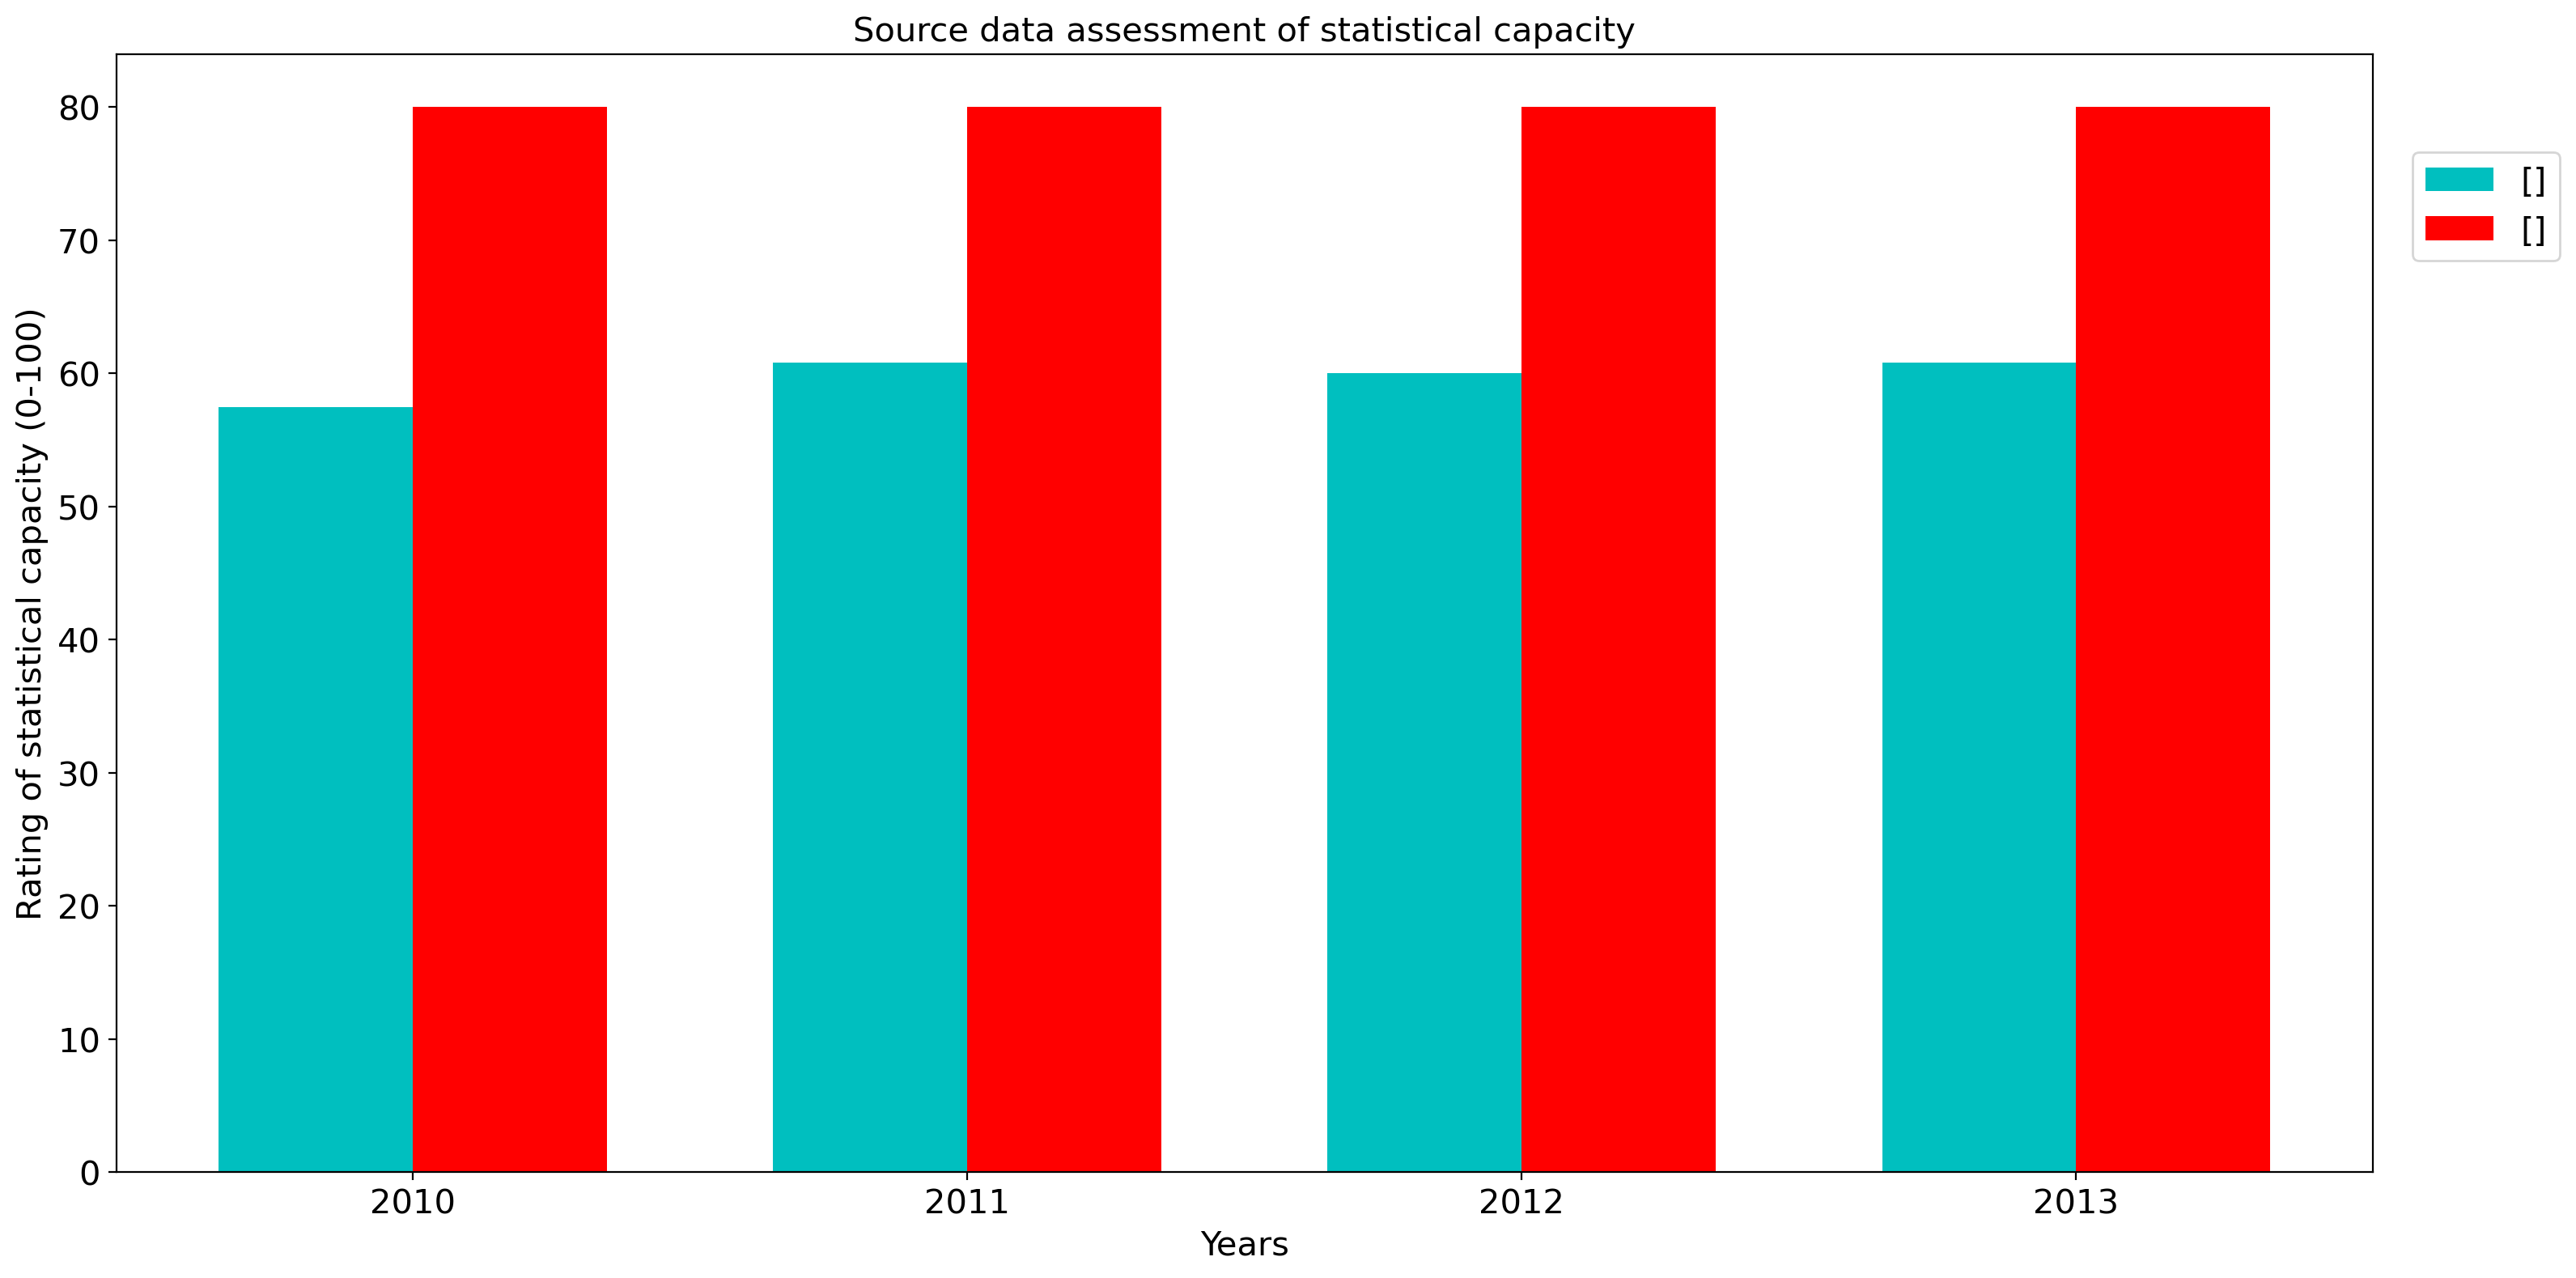

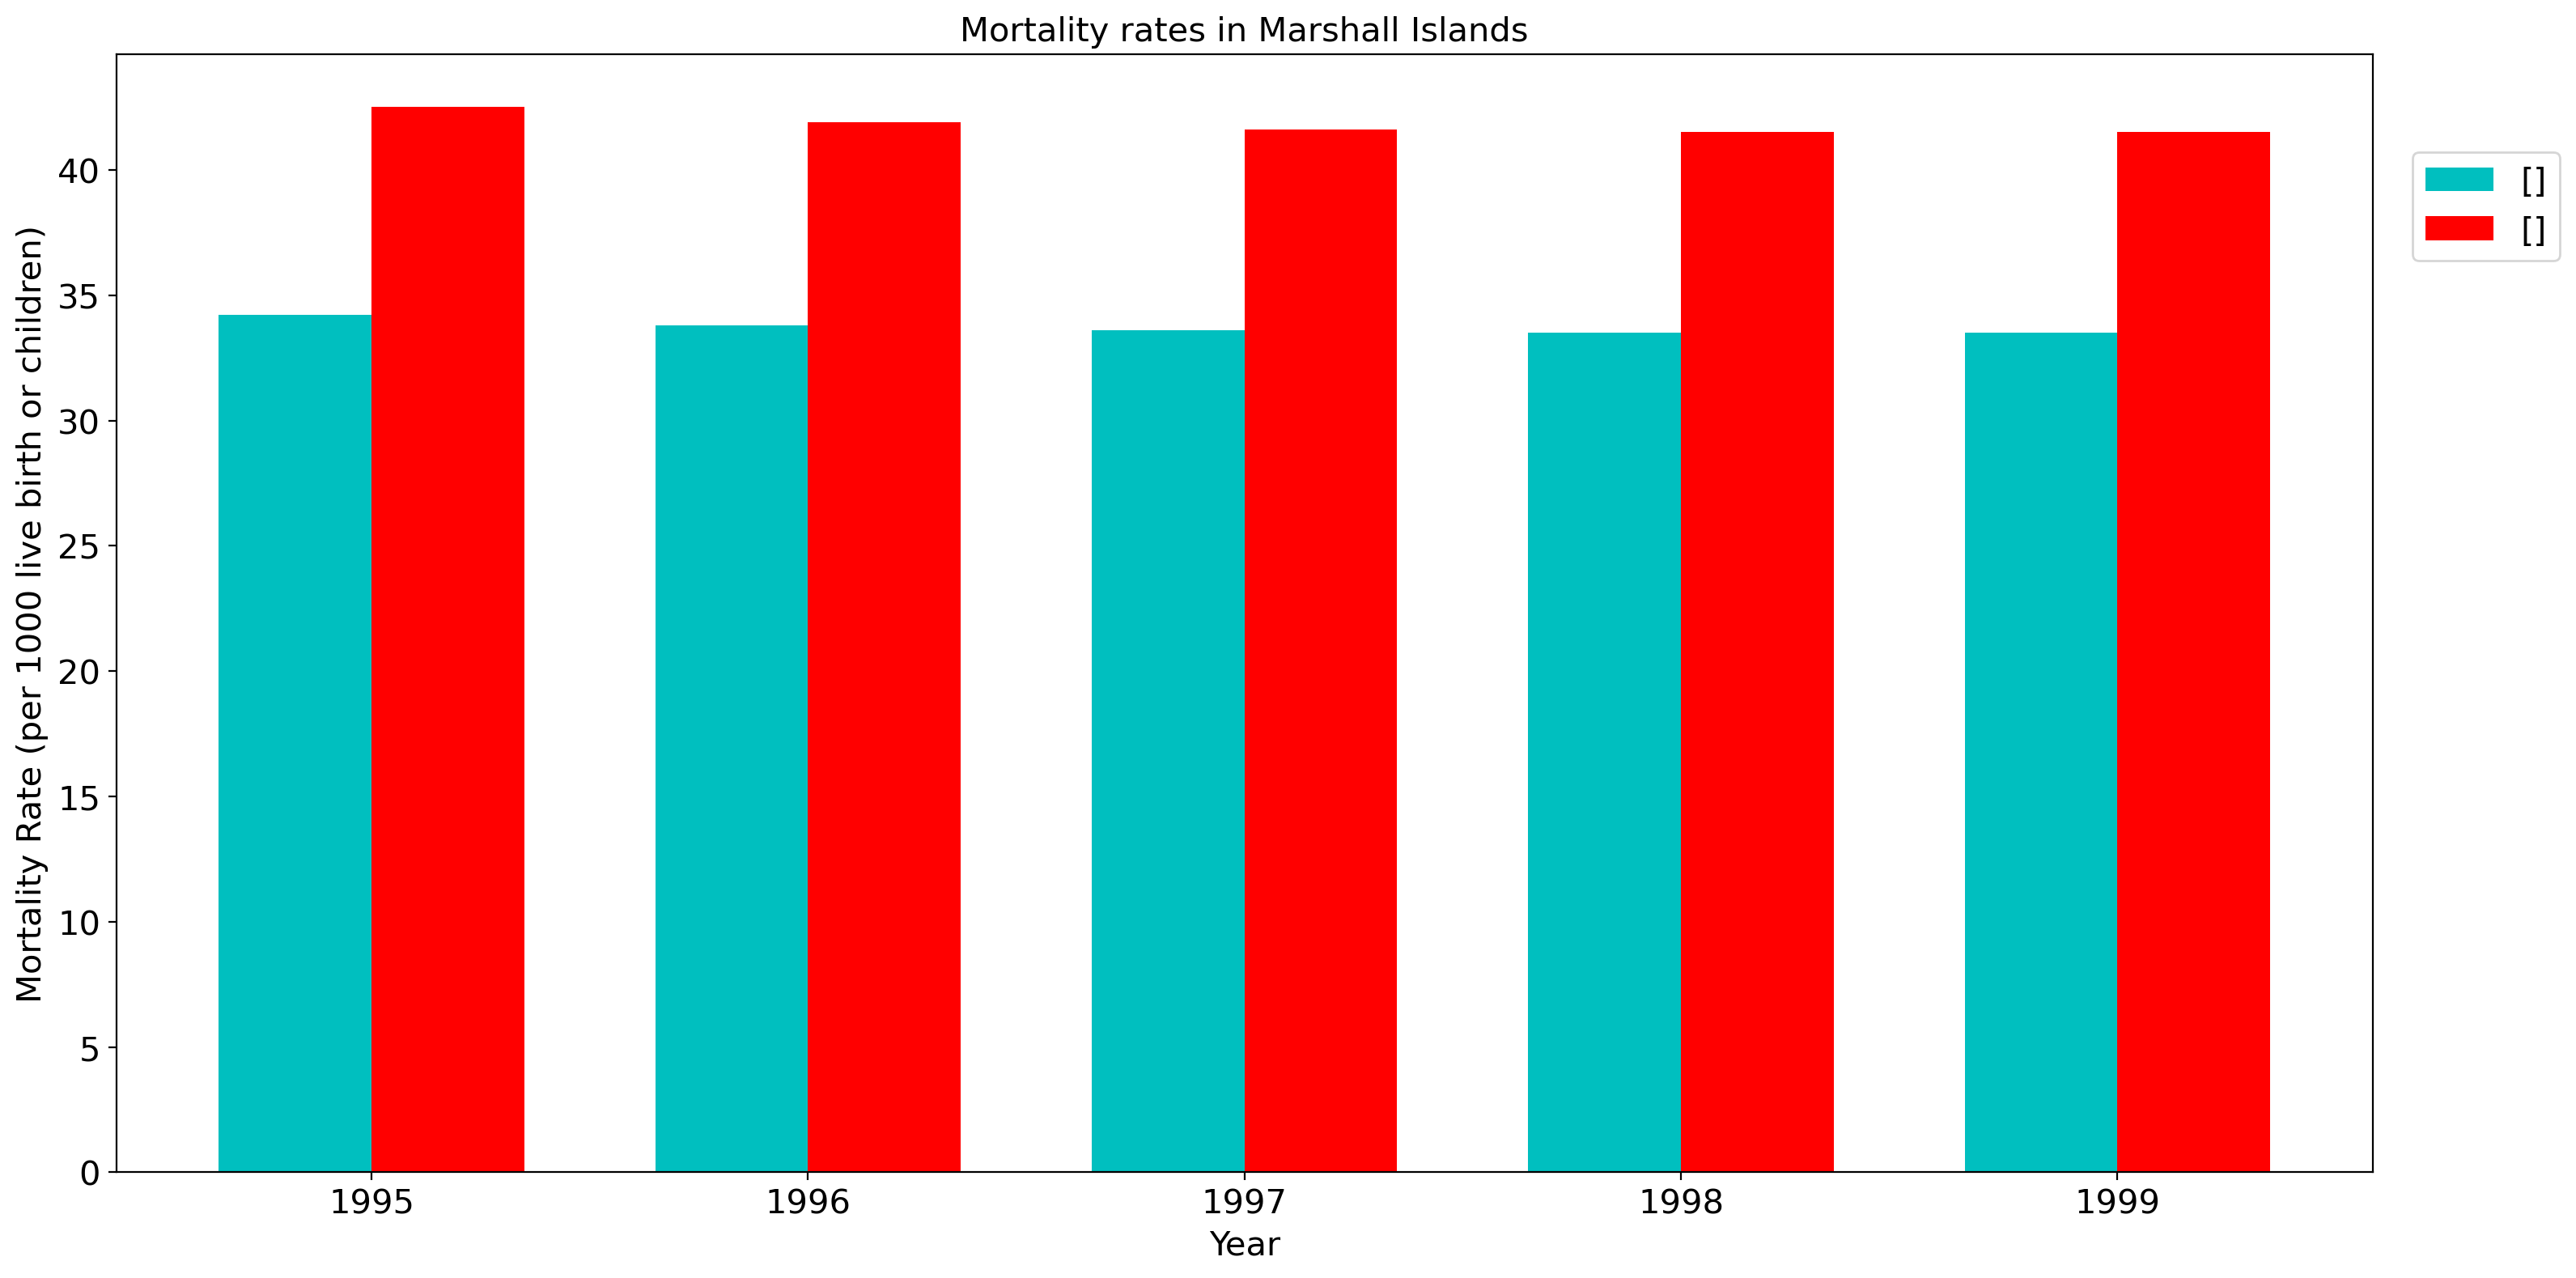

In [ ]:
filename = './Mydataset/collected_data2.json'
legend = [[],[]]
figure_dict = []
y = [[],[]]
with open(filename) as f:
    json_data = json.load(f)
#     print(json_data)

    for json_dict in json_data:

        my_color_list = ['g','r','y','b','c','m','k']
        color1, color2 = random.sample(my_color_list, 2)
#         print(color1, color2)
        
#         my_marker_list = [".","o","^","<","D","P","*","H","+","x"]
#         m = random.choice(my_marker_list)
    
        plot_title = json_dict['title']            #title
        img_idx = json_dict['index']                
        
        y1 = json_dict['y1']
        y2 = json_dict['y2']
        x = json_dict['x']
        x_real = json_dict['x_real']

        x_label = json_dict['x_label']     # x axis label
        y_label = json_dict['y_label']      # y axis label
        
        legend1 = json_dict['legend1']
        legend2 = json_dict['legend2'] 
        
        fig, ax = plt.subplots(figsize=(16,8), dpi=200)
        bar1 = plt.bar(x, y1, label=legend[0], fc=color1, width = 0.35)
        bar2 = plt.bar([i + 0.35 for i in x], y2, label=legend[1], fc=color2, width = 0.35)
        plt.xlabel(x_label, fontsize=15)
        plt.ylabel(y_label, fontsize=15)
        
#         for x, y in zip(x, y[1]):
#             plt.text(x, y, y, ha='center', va='bottom', fontsize=20)
            
        plt.title(plot_title, fontsize=15)
        leg = plt.legend(loc='lower left',bbox_to_anchor=(1.01,0.8), fontsize=15)
        plt.ylim(0)
        plt.xticks([index + 0.175 for index in x],x_real, fontsize=15)
        plt.yticks(fontsize=15)
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        fig.tight_layout()
#         plt.show()
        fig.canvas.draw()
        fig.savefig('./Mydataset/Bar2/Bar%d.png'%int(img_idx), format='png',dpi=200, bbox_inches='tight')
        
#         print('axes bounding box')
        tight_box = (ax.get_tightbbox(ax.figure.canvas.get_renderer()))
        axes_bbox_x = tight_box.x0
        axes_bbox_y = tight_box.y0
        axes_bbox_w = tight_box.x1 - tight_box.x0
        axes_bbox_h = tight_box.y1 - tight_box.y0
        
        axes_box_dict = {"x":axes_bbox_x,"y":axes_bbox_y,"w":axes_bbox_w,"h":axes_bbox_h}
        axes_info = {"bbox":axes_box_dict}      #axes_info
#         print(axes_bbox_x, axes_bbox_y, axes_bbox_w, axes_bbox_h)
#         print(axes_info)
#         print('\n')
        
        data_list1 = []
        data_list2 = []
        dict_model = [[],[]]
        bar1_list = []
        bar2_list = []
#         print('(x,y) pixel coordinates')
        xy_pixels1 = ax.transData.transform(np.vstack([x,y1]).T)
        xpix1, ypix1 = xy_pixels1.T
        xy_pixels2 = ax.transData.transform(np.vstack([x,y2]).T)
        xpix2, ypix2 = xy_pixels2.T
        for i in range(len(x)):
#             print(xpix1[i],ypix1[i])
#             print(xpix2[i],ypix2[i])
            
            dic1 = {"x": xpix1[i] - 10, "y": ypix1[i] - 10}
            data_list1.append(dic1)
            
            dic2 = {"x": xpix2[i] - 10, "y": ypix2[i] - 10}
            data_list2.append(dic2)
            
            b1 = bar1[i].get_window_extent()
            x1 = b1.x0 - 10
            y1 = b1.y0 - 10
            w1 = b1.x1-b1.x0
            h1 = b1.y1-b1.y0
            bar1_dic = {"x":x1, "y":y1 ,"w":w1, "h":h1}
            bar1_list.append(bar1_dic)
            
            b2 = bar2[i].get_window_extent()
            x2 = b2.x0 - 10
            y2 = b2.y0 - 10
            w2 = b2.x1-b2.x0
            h2 = b2.y1-b2.y0
            bar2_dic = {"x":x2, "y":y2 ,"w":w2, "h":h2}
            bar2_list.append(bar2_dic)
            
            
        dict_model[0] = {"name":legend[0],"color":color1, "label":legend[0],"coordinates":data_list1,"x":x,"y":y[0],"bar_bboxes":bar1_list}
        dict_model[1] = {"name":legend[1],"color":color2, "label":legend[1],"coordinates":data_list2,"x":x,"y":y[1],"bar_bboxes":bar2_list}
#         print(dict_model)  #models
#         print('\n')
        
        
#         print('legend bounding boxes')
        leg_bbox = leg.get_window_extent()
        leg_bbox_x = leg_bbox.x0 - 10
        leg_bbox_y = leg_bbox.y0 - 10
        leg_bbox_w = leg_bbox.x1 - leg_bbox.x0
        leg_bbox_h = leg_bbox.y1 - leg_bbox.y0
        legbox_dict = {"x":leg_bbox_x, "y":leg_bbox_y, "w":leg_bbox_w, "h":leg_bbox_h}
        leg_info = {"bbox":legbox_dict}
#         print(leg_info)
#         print(leg_bbox_x, leg_bbox_y, leg_bbox_w, leg_bbox_h)
        
        legitem_bbox_info = []
        legitem_info = []
        for i, l in enumerate(leg.texts):       #???????????????????????????????????????
            legitem_bbox = l.get_window_extent()
            legitem_bbox_x = legitem_bbox.x0
            legitem_bbox_y = legitem_bbox.y0
            legitem_bbox_w = legitem_bbox.x1 - legitem_bbox.x0
            legitem_bbox_h = legitem_bbox.y1 - legitem_bbox.y0
            
            legitem_bbox_dict = {"x":legitem_bbox_x, "y":legitem_bbox_y, "w":legitem_bbox_w, "h":legitem_bbox_h}
            legitem_bbox_info.append(legitem_bbox_dict)
            
#             print(legitem_bbox_x, legitem_bbox_y, legitem_bbox_w, legitem_bbox_h)
        
        legitem1_info = {"model":legend[0],"label":{"text":legend[0],"bbox":legitem_bbox_info[0]}}
        legitem_info.append(legitem1_info)
        legitem2_info = {"model":legend[1],"label":{"text":legend[1],"bbox":legitem_bbox_info[1]}}
        legitem_info.append(legitem2_info)
        legend_info = {"items":legitem_info,"bbox":leg_info}     #legend
#         print(legend_info)
#         print('\n')
        
        xtickslocs = ax.get_xticks()
        ymin, _ = ax.get_ylim()
        xtick_item = []
#         print('xticks pixel coordinates')
#         print(xtickslocs)
        for xtick in xtickslocs:
            xtickloc = ax.transData.transform((xtick, ymin))
            xtick_x = xtickloc[0]
            xtick_y = xtickloc[1]
            
            bbox_item = {"x":xtick_x - 10, "y":xtick_y - 10}
            xtick_item.append(bbox_item)
            
#             print(xtick_x, xtick_y)
            
        xtick_value_double = []
        xtick_item_double = []
        x_num = len(xtickslocs)
        for i in range(x_num):
            xtick_value_double.append(xtickslocs[i])
            xtick_item_double.append(xtick_item[i])
        for i in range(x_num):
            xtick_value_double.append(xtickslocs[i])
            xtick_item_double.append(xtick_item[i])
        xtick_info = {"value": xtick_value_double, "bboxes": xtick_item_double}   #x-ticks_coordinates
#         print(xtick_info)
#         print('\n')
        
        ytickslocs = ax.get_yticks()
        xmin, _ = ax.get_xlim()
#         print('yticks pixel coordinates')
#         print(ytickslocs)
        ytick_item = []
        for ytick in ytickslocs:
            ytickloc = ax.transData.transform((xmin, ytick))
            ytick_x = ytickloc[0]
            ytick_y = ytickloc[1]
            
            bbox_item = {"x":ytick_x - 10, "y":ytick_y - 10}
            ytick_item.append(bbox_item)
            
#             print(ytick_x, ytick_y)
            
        ytick_value_double = []
        ytick_item_double = []
        y_num = len(ytickslocs)
        for i in range(y_num):
            ytick_value_double.append(ytickslocs[i])
            ytick_item_double.append(ytick_item[i])
        for i in range(y_num):
            ytick_value_double.append(ytickslocs[i])
            ytick_item_double.append(ytick_item[i])
        ytick_info = {"value": ytick_value_double, "bboxes": ytick_item_double}   #y-ticks_coordinates
#         print(ytick_info)
#         print('\n')
        
#         print('xticks label bounding boxes')
        xticklabel_item = []
        for l in ax.get_xticklabels():
            xtickslabel_bbox = l.get_window_extent()
            xtickslabel_bbox_x = xtickslabel_bbox.x0 - 10
            xtickslabel_bbox_y = xtickslabel_bbox.y0 - 10
            xtickslabel_bbox_w = xtickslabel_bbox.x1 - xtickslabel_bbox.x0
            xtickslabel_bbox_h = xtickslabel_bbox.y1 - xtickslabel_bbox.y0
#             print(xtickslabel_bbox_x, xtickslabel_bbox_y, xtickslabel_bbox_w, xtickslabel_bbox_h)
            bbox_item = {"x":xtickslabel_bbox_x, "y":xtickslabel_bbox_y ,"w":xtickslabel_bbox_w, "h":xtickslabel_bbox_h}
            xticklabel_item.append(bbox_item)
        x_double = []
        xticklabel_item_double = []
        x_num = len(x_real)
        for i in range(x_num):
            x_double.append(x_real[i])
            xticklabel_item_double.append(xticklabel_item[i])
        for i in range(x_num):
            x_double.append(x_real[i])
            xticklabel_item_double.append(xticklabel_item[i])
            
        xticklabel_info = {"value":x_double, "bboxes":xticklabel_item_double}  #x-tick_labels
#         print(xticklabel_info)
#         print('\n')
        
#         ax.YAxis.set_label_coords(0,0)
#         print('x axis label bounding boxes')
        xlabel_bbox = ax.xaxis.label.get_window_extent()
        xlabel_bbox_x = xlabel_bbox.x0 - 10
        xlabel_bbox_y = xlabel_bbox.y0 - 10
        xlabel_bbox_w = xlabel_bbox.x1 - xlabel_bbox.x0
        xlabel_bbox_h = xlabel_bbox.y1 - xlabel_bbox.y0
        
        xlabel_box_dict = {"x":xlabel_bbox_x, "y":xlabel_bbox_y, "w":xlabel_bbox_w, "h":xlabel_bbox_h}
        xlabel_info = {"text":x_label, "bbox":xlabel_box_dict}     #x-label
#         print(xlabel_bbox_x, xlabel_bbox_y, xlabel_bbox_w, xlabel_bbox_h)
#         print(xlabel_info)
#         print('\n')
        
#         print('yticks label bounding boxes')
        yticklabel_item = []
        for l in ax.get_yticklabels():
            ytickslabel_bbox = l.get_window_extent()
            ytickslabel_bbox_x = ytickslabel_bbox.x0 - 10
            ytickslabel_bbox_y = ytickslabel_bbox.y0 - 10
            ytickslabel_bbox_w = ytickslabel_bbox.x1 - ytickslabel_bbox.x0
            ytickslabel_bbox_h = ytickslabel_bbox.y1 - ytickslabel_bbox.y0
#             print(ytickslabel_bbox_x, ytickslabel_bbox_y, ytickslabel_bbox_w, ytickslabel_bbox_h)
            bbox_item = {"x":ytickslabel_bbox_x, "y":ytickslabel_bbox_y ,"w":ytickslabel_bbox_w, "h":ytickslabel_bbox_h}
            yticklabel_item.append(bbox_item)
        y_double = []
        yticklabel_item_double = []
        y_num = len(x)
        for i in range(y_num):
#             y_double.append(y1[i])
            yticklabel_item_double.append(yticklabel_item[i])
        for i in range(y_num):
#             y_double.append(y2[i])
            yticklabel_item_double.append(yticklabel_item[i])
            
        yticklabel_info = {"bboxes":yticklabel_item_double}  #y-tick_labels
#         print(yticklabel_info)
#         print('\n')
        
#         print('y axis label bounding boxes')
        ylabel_bbox = ax.yaxis.label.get_window_extent()
        ylabel_bbox_x = ylabel_bbox.x0 - 10
        ylabel_bbox_y = ylabel_bbox.y0 - 10
        ylabel_bbox_w = ylabel_bbox.x1 - ylabel_bbox.x0
        ylabel_bbox_h = ylabel_bbox.y1 - ylabel_bbox.y0
#         print(ylabel_bbox_x, ylabel_bbox_y, ylabel_bbox_w, ylabel_bbox_h)
        
        ylabel_box_dict = {"x":ylabel_bbox_x, "y":ylabel_bbox_y, "w":ylabel_bbox_w, "h":ylabel_bbox_h}
        ylabel_info = {"text":y_label, "bbox":ylabel_box_dict}     #y-label
#         print(ylabel_info)
#         print('\n')
        
#         print('title bounding box')
        title_bbox = ax.title.get_window_extent()
        title_bbox_x = title_bbox.x0 - 10
        title_bbox_y = title_bbox.y0 - 10
        title_bbox_w = title_bbox.x1 - title_bbox.x0
        title_bbox_h = title_bbox.y1 - title_bbox.y0
#         print(title_bbox_x, title_bbox_y, title_bbox_w, title_bbox_h)
#         print('\n')
        
        titlebox_dict = {"x":title_bbox_x, "y":title_bbox_y, "w":title_bbox_w, "h":title_bbox_h}
        title_info = {"text":plot_title,"bbox":titlebox_dict}     #title
        
        
        x_axis_dict = {"tick_labels":xticklabel_info,"ticks_coordinates":xtick_info,"label":xlabel_info}
        y_axis_dict = {"tick_labels":yticklabel_info,"ticks_coordinates":ytick_info,"label":ylabel_info}
        general_figure_info = {"title":title_info, "x_axis":x_axis_dict,"axes_info":axes_info,"y_axis":y_axis_dict,"legend":legend_info}
        figure_item = {"model":dict_model,"type":"line_plot","general_figure_info":general_figure_info,"image_index":int(img_idx)}
#         print(figure_item)
        
        figure_dict.append(figure_item)
        
#         print(title_info)    #general_figure_info（title）
        
#         break
#         for i,l in enumerate(leg.texts):
#             print(l)

In [ ]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
# print(figure_dict)
with open('./Mydataset/Bar2.json', 'w') as fp:
    json.dump(figure_dict, fp, cls=NpEncoder, indent=2)
# file = open('Scatter_example.json','w',encoding='utf-8')
# json.dump(figure_dict,file,ensure_ascii=False)

In [ ]:
img = np.array(Image.open('./Line3.png'))
fig, ax1 = plt.subplots(figsize=(16,8), dpi=200)
fig.set_tight_layout
ax1.imshow(np.flipud(img),origin='lower')
# Create a Rectangle patch

title_box = patches.Rectangle((777.8986111111105, 1517.9999999999995),1377.2500000000002,42.0,linewidth=1,edgecolor='r',facecolor='none')
data_box = patches.Rectangle((1466.5236111111108,1298.6210512701045),30,30,linewidth=1,edgecolor='r',facecolor='none')
xlabel_box = patches.Rectangle((1422.4611111111105,20.000000000000043),88.125,42.0,linewidth=1,edgecolor='r',facecolor='none')
xticklabel_box = patches.Rectangle((1413.5861111111108,73.11111111111116),105.875,42.0,linewidth=1,edgecolor='r',facecolor='none')
xtick_box = patches.Rectangle((854.0949494949492,134.5555555555556),30,30,linewidth=1,edgecolor='r',facecolor='none')
ylabel_box = patches.Rectangle((19.99999999999995,669.2569444444443),42.00000000000002,306.375,linewidth=1,edgecolor='r',facecolor='none')
yticklabel_box = patches.Rectangle((73.23611111111107,1109.4744894416128),26.5,42.0,linewidth=1,edgecolor='r',facecolor='none')
ytick_box = patches.Rectangle((119.18055555555549,1134.9744894416128),30,30,linewidth=1,edgecolor='r',facecolor='none')
legend_box = patches.Rectangle((2984.9801944444434+10,1325.5111111111107+10),150.5,42.0,linewidth=1,edgecolor='r',facecolor='none')


# Add the patch to the Axes
ax1.add_patch(title_box)
ax1.add_patch(data_box)
ax1.add_patch(xticklabel_box)
ax1.add_patch(xlabel_box)
ax1.add_patch(xtick_box)
ax1.add_patch(yticklabel_box)
ax1.add_patch(ylabel_box)
ax1.add_patch(ytick_box)
ax1.add_patch(legend_box)

# fig.savefig('./annotation_example.png', format='png',dpi=200, bbox_inches='tight')
plt.show()
